**Project "Space Brothers"**

We have to analyze the data of the mobile game "Space Brothers", we have two main tasks:
- analysis of user behavior depending on the source of the transition
- development of recommendations for building game monetization

At this stage, for monetization, the option of adding advertising to the build menu is being considered.

Research steps:
* Step 1. Loading data and preparing it for analysis
- Consider gaps
* Step 2. Exploratory data analysis
- Consider the data, answer the question is all the data important?
- Consider user profiles. Determine the minimum and maximum user acquisition date, maximum and minimum number of buildings. Consider traffic sources and cost of user acquisition
- Find out from which sources of users comes the most
- Calculate the average cost of attracting players through different channels
* Step 3. Analysis of different sources of customer acquisition
* Step 4. Analysis of the influence of the source of transition to the game on user behavior
* Step 5. Analysis and formation of hypotheses
- Let's test the hypothesis: the time to complete the level differs depending on the way of passing
- Let's test the hypothesis: user activity differs depending on the acquisition channel
Null hypothesis: The activity of users attracted from different sources is the same.
Alternative hypothesis: The activity of users attracted from different sources varies.
* Step 6. Conclusions and basic recommendations for working with users
* Step 7. Building the dashboard

## Loading data and preparing for analysis

## Libraries

In [1]:
# work with tabular data
import pandas as pd

# work with data arrays, rounding
import numpy as np

import matplotlib.pyplot as plt

# import scipy to calculate statistical significance
from scipy import stats as st


import matplotlib as plt


In [2]:
# loading data

df_actions = pd.read_csv('https://code.s3.yandex.net/datasets/game_actions.csv')
df_costs   = pd.read_csv('https://code.s3.yandex.net/datasets/ad_costs.csv')
df_source  = pd.read_csv('https://code.s3.yandex.net/datasets/user_source.csv')


In [3]:
# look at the data
df_actions.info()
print()
df_costs.info()
print()
df_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  135640 non-null  object
 1   event           135640 non-null  object
 2   building_type   127957 non-null  object
 3   user_id         135640 non-null  object
 4   project_type    1866 non-null    object
dtypes: object(5)
memory usage: 5.2+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  28 non-null     object 
 1   day     28 non-null     object 
 2   cost    28 non-null     float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   us

Notes:
- Column names flawlessly
- Need to change data type to data for event_datetime and day
- There are building_type and project_type omissions. this is the missing data caused by the structure of the game and the data will be replaced with zeros

In [4]:
# change data type to date
df_costs['day_dt'] = df_costs['day'].astype("datetime64[ns]")
df_actions['event_datetime_dt'] = df_actions['event_datetime'].astype("datetime64[ns]")

In [5]:
# replace gaps with 0
columns_to_replace = ['building_type', 'project_type']
for column in columns_to_replace:
    df_actions[column] = df_actions[column].fillna(0)

In [6]:
# check the changes
df_actions.info()
print()
df_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   event_datetime     135640 non-null  object        
 1   event              135640 non-null  object        
 2   building_type      135640 non-null  object        
 3   user_id            135640 non-null  object        
 4   project_type       135640 non-null  object        
 5   event_datetime_dt  135640 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 6.2+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   source  28 non-null     object        
 1   day     28 non-null     object        
 2   cost    28 non-null     float64       
 3   day_dt  28 non-null     datetime64[ns]
dtypes: datetime

### Conclusions on data preprocessing
- all data is correct
- replaced gaps and changed data type to data

## Exploratory data analysis

The satellite_orbital_assembly datatype raises doubts whether they matter. Consider these users.

In [7]:
df_actions['project_type'].unique()

array([0, 'satellite_orbital_assembly'], dtype=object)

In [8]:
# filter the data satellite_orbital_assembly
df_actions_project_type = df_actions.query('project_type == "satellite_orbital_assembly"')

In [9]:
# look at satellite_orbital_assembly
display(df_actions_project_type.head(3))

,event_datetime,event,building_type,user_id,project_type,event_datetime_dt
47121,2020-05-08 18:10:25,project,0,e3c66498-9d45-4000-9392-f81e6796e7da,satellite_orbital_assembly,2020-05-08 18:10:25
57398,2020-05-09 13:49:11,project,0,936e7af6-8338-4703-a1df-fc6c3f5b8e34,satellite_orbital_assembly,2020-05-09 13:49:11
58797,2020-05-09 16:19:33,project,0,a4491c86-c498-4f74-a56e-65c136d0e9a1,satellite_orbital_assembly,2020-05-09 16:19:33


These data are correct and can be used for further analysis.

### Consider user profiles

Determine the minimum and maximum user acquisition date, the maximum and minimum number of buildings, and the average number of buildings.

In [10]:
df_actions['event_datetime_dt'].max()

Timestamp('2020-06-05 12:32:49')

In [11]:
df_actions['event_datetime_dt'].min()

Timestamp('2020-05-04 00:00:01')

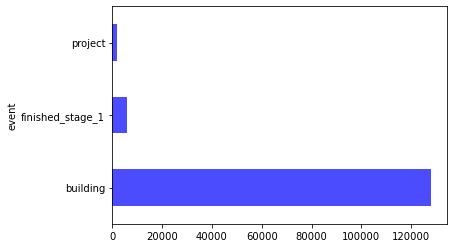

In [12]:
# look at events for users

df_actions_group_event = df_actions.groupby(['event'])['event'].count()

df_actions_group_event.plot.barh(color='b', alpha=0.7);

In [13]:
df_actions_group_event

event
building            127957
finished_stage_1      5817
project               1866
Name: event, dtype: int64

In [14]:
# consider the types of buildings built

df_actions_group_building = df_actions.groupby(['building_type'])['building_type'].count()

#display(df_actions_group_building)

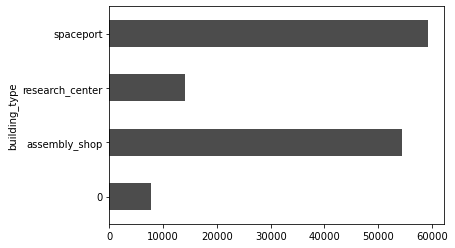

In [15]:
# build a graph
df_actions_group_building.plot.barh(color='k', alpha=0.7);

In [16]:
df_actions_group_building

building_type
0                   7683
assembly_shop      54494
research_center    14138
spaceport          59325
Name: building_type, dtype: int64

In [17]:
# minimum and maximum number of buildings

df_actions.groupby(['user_id'])['event'].count().sort_values(ascending=False)

user_id
d6aca06a-cd75-4cd8-b8cd-240a3c163884    22
ff841992-d93b-462e-bc6e-18c24a514f36    22
bf542075-e3a2-4e79-82d8-3838e86d2a25    22
45935e5d-8f50-4176-83d3-fd545bb2015f    21
94844e06-0352-4048-9e62-1db7718f804c    21
                                        ..
fcefbdaa-5f8b-49a6-91f3-8c09e0a94a5d     1
b9d266a0-7741-49ba-9125-134c5969f8d1     1
ded24248-15c7-4037-9092-f64fcaa651e7     1
b783fde3-5416-43fb-99b0-2c6e5f787d6f     1
70362b15-8a0b-4fb7-8a67-4454fd7098d7     1
Name: event, Length: 13576, dtype: int64

### Findings from exploratory data analysis

- project_type data is correct and can be used for further work
- user activity dates from 2020-05-04 to 2020-06-05
- most events for building users, followed by finished_stage_1 and least project
- most often they build a spaceport, followed by assembly_shop, research_center
- number of buildings by event from 1 to 22

### Consider traffic sources

In [18]:
df_source.head(3)

,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama


In [19]:
df_source_group = df_source.groupby('source').count().sort_values('user_id', ascending = False).reset_index()
display(df_source_group)

,source,user_id
0,yandex_direct,4817
1,instagram_new_adverts,3347
2,facebook_ads,2726
3,youtube_channel_reklama,2686


## Analysis of different sources of customer acquisition

In [20]:
df_costs_group = df_costs.groupby('source').sum().reset_index()

In [21]:
display(df_costs_group)

,source,cost
0,facebook_ads,2140.904643
1,instagram_new_adverts,2161.441691
2,yandex_direct,2233.111449
3,youtube_channel_reklama,1068.119204


In [22]:
# merge tables
df_costs_group = df_source_group.merge(df_costs_group, on='source', how='left')

In [23]:
# add the average
df_costs_group['mean'] = df_costs_group['cost']/df_costs_group['user_id']

In [24]:
display(df_costs_group)

,source,user_id,cost,mean
0,yandex_direct,4817,2233.111449,0.463590
1,instagram_new_adverts,3347,2161.441691,0.645785
2,facebook_ads,2726,2140.904643,0.785365
3,youtube_channel_reklama,2686,1068.119204,0.397662


### Conclusions on the analysis of different sources of customer acquisition

- most attracted from yandex_direct, followed by instagram_new_adverts and facebook_ads
- highest average user acquisition cost for facebook_ads (0.76) lowest for youtube_channel_reklama (0.39)

## Analysis of the influence of the source of transition to the game on user behavior

In [25]:
# aggregation data

df_actions = df_actions.merge(df_source, on='user_id', how='left')

In [27]:
df_actions.head(3)

,event_datetime,event,building_type,user_id,project_type,event_datetime_dt,source
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,0,2020-05-04 00:00:01,youtube_channel_reklama
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,0,2020-05-04 00:00:03,facebook_ads
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,0,2020-05-04 00:00:16,instagram_new_adverts


In [28]:
# create a pivot table, group data
df_actions_group = df_actions.groupby(['source', 'event'])['event'].count()#.reset_index()
display(df_actions_group)

source                   event           
facebook_ads             building            26131
                         finished_stage_1     1150
                         project               391
instagram_new_adverts    building            31815
                         finished_stage_1     1466
                         project               476
yandex_direct            building            45032
                         finished_stage_1     2042
                         project               620
youtube_channel_reklama  building            24979
                         finished_stage_1     1159
                         project               379
Name: event, dtype: int64

Let's build a graph to evaluate the actions of users attracted from different channels.

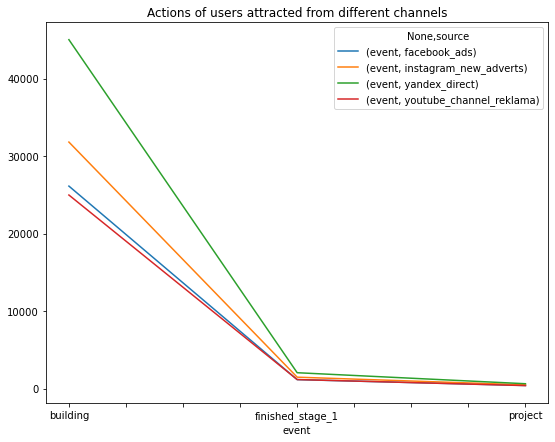

In [35]:
# graph by grouped data
# channel - number of events
df_actions_group.to_frame().unstack(level=0).plot(kind='line', title='Actions of users attracted from different channels', rot=0, figsize=(9, 7), layout=(2, 3));

# plt.title('My Title')


In [37]:
df_actions_group_build = df_actions.groupby(['source', 'building_type'])['event'].count()
display(df_actions_group_build)

source                   building_type  
facebook_ads             0                   1541
                         assembly_shop      11117
                         research_center     2945
                         spaceport          12069
instagram_new_adverts    0                   1942
                         assembly_shop      13431
                         research_center     3537
                         spaceport          14847
yandex_direct            0                   2662
                         assembly_shop      19295
                         research_center     4952
                         spaceport          20785
youtube_channel_reklama  0                   1538
                         assembly_shop      10651
                         research_center     2704
                         spaceport          11624
Name: event, dtype: int64

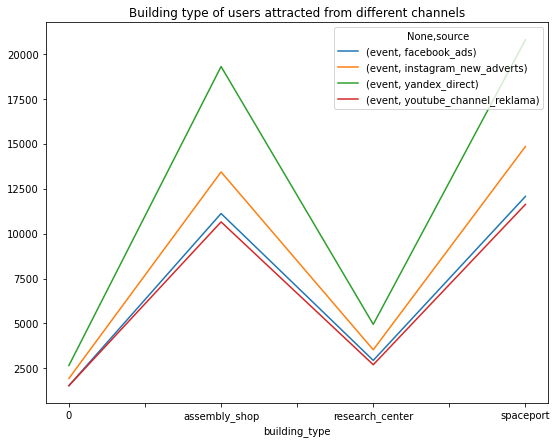

In [38]:
# строения
df_actions_group_2.to_frame().unstack(level=0).plot(title='Building type of users attracted from different channels',kind='line', rot=0, figsize=(9, 7), layout=(2, 3));

### Conclusions on the analysis of sources of attraction

Most users were attracted from yandex_direct in second place instagram_new_adverts, followed by facebook_ads and youtube_channel_reklama

Based on the graphs, it can be seen that yandex_direct is the most active in terms of events and construction, followed by instagram_new_adverts

We can make a general conclusion that it is most profitable to attract players through youtube_channel_reklama and yandex_direct (especially taking into account activity) and the most unprofitable channel is facebook_ads

### Let's test the hypothesis: the time to complete the level differs depending on the way of passing

In [39]:
df_actions.head(3)

,event_datetime,event,building_type,user_id,project_type,event_datetime_dt,source
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,0,2020-05-04 00:00:01,youtube_channel_reklama
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,0,2020-05-04 00:00:03,facebook_ads
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,0,2020-05-04 00:00:16,instagram_new_adverts


### get list finished_stage_1 + project

In [40]:
# create a boolean column finished_stage_1 = True
df_actions['enemy_bool'] = df_actions.loc[:, 'event'] == 'project'

In [41]:
# getting all id
df_actions_project_id = df_actions.pivot_table(index='user_id', values='enemy_bool')

In [ ]:
#print(len(df_actions_enemy_id_all))
#df_actions_enemy_id_all.head()

In [42]:
# filter out those not equal to 0
df_actions_project_id_good = df_actions_project_id.query('enemy_bool > 0')

In [43]:
df_actions_project_id_good.head(3)

,enemy_bool
user_id,
006380d6-67a6-45de-ab1e-6eb54ad8dbe8,0.076923
00be7371-fa79-4fbd-b8e7-8ba32e3f8f82,0.071429
00c2b9f2-2615-439c-aed0-6974e4c6c1c1,0.076923


In [44]:
# create a pivot table
df_pivot = df_actions.pivot_table(index='user_id', values='event_datetime_dt', aggfunc=['min', 'max']).reset_index()
df_pivot.columns = ['user_id', 'min', 'max']

In [46]:
# find the difference
df_pivot['how_long'] = df_pivot['max'] - df_pivot['min']
display(df_pivot.head(3))

,user_id,min,max,how_long
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-06 01:07:37,2020-05-20 11:26:06,14 days 10:18:29
1,00151b4f-ba38-44a8-a650-d7cf130a0105,2020-05-06 03:09:12,2020-05-18 10:46:52,12 days 07:37:40
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,2020-05-05 18:08:52,2020-05-14 09:21:27,8 days 15:12:35


In [47]:
# add duration value in hour
df_pivot['how_long_hour'] = df_pivot['how_long'] / pd.Timedelta(hours = 1)

In [48]:
df_pivot.head(3)

,user_id,min,max,how_long,how_long_hour
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-06 01:07:37,2020-05-20 11:26:06,14 days 10:18:29,346.308056
1,00151b4f-ba38-44a8-a650-d7cf130a0105,2020-05-06 03:09:12,2020-05-18 10:46:52,12 days 07:37:40,295.627778
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,2020-05-05 18:08:52,2020-05-14 09:21:27,8 days 15:12:35,207.209722


In [50]:
# filter by values corresponding to id in df_actions_enemy_id
df_finish_project = df_pivot.query('user_id in @df_actions_project_id_good.index')

In [51]:
# check the quantity
display(len(df_finish_project))

1866

### get a list finished_stage_1 - project

In [52]:
# filter out those not equal to 0
df_actions_project_id_zero = df_actions_project_id.query('enemy_bool == 0')

In [53]:
# filter by values corresponding to id in df_actions_enemy_id
df_enemy = df_pivot.query('user_id in @df_actions_project_id_zero.index')

In [54]:
# check the quantity
display(len(df_enemy))

11710

### merge and preparing data for the test

In [55]:
# add data by id
df_enemy = df_enemy.merge(df_pivot, on='user_id', how='left')

In [57]:
# check the length
len(df_enemy)

11710

In [58]:
# data for defeating the enemy
df_enemy_test = df_enemy.loc[:, 'how_long_hour_x']

In [59]:
df_finish_project = df_finish_project.merge(df_pivot, on='user_id', how='left')

In [60]:
# data for project implementation
df_finish_project_test = df_finish_project.loc[:, 'how_long_hour_x']

In [61]:
# the number of those who complete the level through the project
len(set(df_finish_project['user_id']))

1866

In [62]:
# the number of those who complete the level by defeating the enemy
len(set(df_enemy['user_id']))

11710

### form hypotheses

Let's test the hypothesis: the time to complete the level differs depending on the way of passing

Null hypothesis: the level completion time for the type of passage "Project implementation" is the same as for the type "Victory over enemies"

Alternative hypothesis: the level completion time for the type of passage "Project implementation" is different, for the type "Victory over enemies"

In [63]:
alpha = 0.01 # set the level of statistical significance

#  test the hypothesis that the means of two independent populations are equal
hypothesis_test = st.ttest_ind(
    df_enemy_test, 
    df_finish_project_test)
print('p-value:', hypothesis_test.pvalue ) 

if hypothesis_test.pvalue < alpha:
    print("We accept an alternative hypothesis")
else:
    print("We accept the null hypothesis")

p-value: 4.305574484271593e-201
We accept an alternative hypothesis


## Let's test the hypothesis: the time to complete the level differs depending on the way of passing

Let's test the hypothesis: user activity differs depending on the acquisition channel.

Null hypothesis: The activity of users attracted from different sources is the same. 

Alternative hypothesis: The activity of users attracted from different sources varies.


Let's compare the time of activity depending on different sources of attraction. To do this, we compare the samples for all 4 channels with the total.

### data for Yandex

In [64]:
# filtering Yandex
df_yandex_direct = df_actions.query("source == 'yandex_direct'")

In [65]:
# add data by id
df_yandex_direct = df_yandex_direct.merge(df_pivot, on='user_id', how='left')

In [66]:
df_yandex_direct.head(3)

,event_datetime,event,building_type,user_id,project_type,event_datetime_dt,source,enemy_bool,min,max,how_long,how_long_hour
0,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,0,2020-05-04 00:00:35,yandex_direct,False,2020-05-04 00:00:35,2020-05-11 14:18:05,7 days 14:17:30,182.291667
1,2020-05-04 00:00:38,building,assembly_shop,beb8ca15-33a9-465d-b47b-89aa96f89c9a,0,2020-05-04 00:00:38,yandex_direct,False,2020-05-04 00:00:38,2020-05-16 01:56:54,12 days 01:56:16,289.937778
2,2020-05-04 00:00:44,building,assembly_shop,65a92713-5969-48b1-8945-bfefa5063887,0,2020-05-04 00:00:44,yandex_direct,False,2020-05-04 00:00:44,2020-05-18 03:50:27,14 days 03:49:43,339.828611


In [67]:
# check the length
len(df_yandex_direct)

47694

In [68]:
# удалим дубликаты
df_yandex_direct = df_yandex_direct.drop_duplicates("user_id")

In [69]:
# check the length
len(df_yandex_direct)

4817

In [70]:
# data for Yandex
df_yandex_direct_test = df_yandex_direct.loc[:, 'how_long_hour']

In [71]:
len(df_yandex_direct_test)

4817

### data for Instagram

In [73]:
# filtering instagram
df_instagram_new_adverts = df_actions.query("source == 'instagram_new_adverts'")

In [74]:
# adding data by id
df_instagram_new_adverts = df_instagram_new_adverts.merge(df_pivot, on='user_id', how='left')

In [75]:
# remove duplicates
df_instagram_new_adverts = df_instagram_new_adverts.drop_duplicates("user_id")

In [76]:
# data for instagram
df_instagram_new_adverts_test = df_instagram_new_adverts.loc[:, 'how_long_hour']

In [77]:
# check the quantity
len(df_instagram_new_adverts_test)

3347

### data for Facebook

In [78]:
df_facebook_ads = df_actions.query("source == 'facebook_ads'")

In [79]:
df_facebook_ads = df_facebook_ads.merge(df_pivot, on='user_id', how='left')

In [80]:
# drop duplicates
df_facebook_ads = df_facebook_ads.drop_duplicates("user_id")

In [81]:
# data for df_facebook
df_facebook_ads_test = df_facebook_ads.loc[:, 'how_long_hour']

In [82]:
# checkup
len(df_facebook_ads)

2726

### data for Youtube

In [83]:
# filtering youtube
df_youtube_channel_reklama = df_actions.query("source == 'youtube_channel_reklama'")

In [84]:
# add data by id
df_youtube_channel_reklama = df_youtube_channel_reklama.merge(df_pivot, on='user_id', how='left')

In [85]:
# drop duplicates
df_youtube_channel_reklama = df_youtube_channel_reklama.drop_duplicates("user_id")

In [86]:
# data for youtube
df_youtube_channel_reklama_test = df_youtube_channel_reklama.loc[:, 'how_long_hour']

In [87]:
# checkuo
len(df_youtube_channel_reklama)

2686

### test comparison data

In [88]:
# remove duplicates
df_pivot_drop_duplicates = df_pivot.drop_duplicates("user_id")

In [89]:
# data for test comparison
df_actions_test = df_pivot_drop_duplicates.loc[:, 'how_long_hour']

In [90]:
# chekup
len(df_actions_test)

13576

### hypothesis testing

Let's check all 4 hypotheses in a row, where the null hypothesis is:

The time of the selected source is the same as for the entire sample.

The time of the selected source differs from the entire sample.

In [91]:

x = [df_yandex_direct_test, df_instagram_new_adverts_test, df_facebook_ads_test, df_youtube_channel_reklama_test]
# set the level of statistical significance
alpha = 0.01 

#  test the hypothesis that the means of two independent populations are equal
for index in x:
    hypothesis_test = st.ttest_ind(df_actions_test, index)
    print('p-value:', hypothesis_test.pvalue,  ) 
    if hypothesis_test.pvalue < alpha:
        print("We accept an alternative hypothesis")
    else:
        print("We accept the null hypothesis")

p-value: 0.4093914065377584
We accept the null hypothesis
p-value: 0.17901678524817632
We accept the null hypothesis
p-value: 0.5418488705040003
We accept the null hypothesis
p-value: 0.3338114169914649
We accept the null hypothesis


The time for all four samples is different:

- time spent for facebook_ads group above all other groups
- Yandex is in second place

At the same time, no average statistical difference at alpha = 0.01 is observed for any of the selected channels.

## General conclusions and basic recommendations for working with users

### General conclusions

Most of the users are attracted by yandex_direct - 4817 then follow:

- instagram_new_adverts 3347
- facebook_ads 2726
- youtube_channel_reklama 2686

The time to complete the level for the type of passage "Project implementation" is different, for the type "Victory over the enemy"
 
  At the same time, this difference is quite significant, which characterizes the different behavior of the players at this stage.

The highest cost of attracting players for facebook_ads - 0.785365

- facebook_ads              0.785365
- instagram_new_adverts     0.645785
- yandex_direct             0.463590
- youtube_channel_reklama	0.397662

In comparing the time in the game by sources, the facebook_ads channel leads, followed by yandex_direct. At the same time, no average statistical difference at alpha = 0.01 is observed for any of the selected channels.

### Recommendations

- Based on the comparison of the average statistical time of users attracted from different channels, their activity and the average cost of attracting one user, we can recommend focusing on attracting new players from the yandex_direct and instagram_new_adverts channels

- As a result of the test, it turned out that the average behavior of players attracted from different channels does not differ at this stage of the game. To increase the time spent in the game at this stage, it is recommended to introduce additional bonuses or discounts for players. It is quite logical to assume that the longer a player stays at this level, the longer he will be an active player in the game.

- It is possible to recommend conducting additional analysis and conducting an A / B test for the introduction of advertising in the menu of buildings, according to the data currently available, it is impossible to make reasonable recommendations for monetization.